# STA 208 Final Project - Spring 2020
## Identify the Category of Foliar Diseases in Apple Trees with Different Models
### Group Members: Yifu Wu, Bingzheng Xu, Chen Zhang

#### Introduction and EDA

We used Plant Pathology 2020 - FGVC7 in Kaggle as the topic as our final project. The Kaggle competition is to diagnose apple diseases based on leaf images. This is a classification problem with four different classes, which are scab, rust, healthy and multiple diseases. The training set has 1821 images, and the testing set also have 1821 images. 

In this project, we have implemented and evaluated (prediction accuracy) several classification methods including K Nearest Neighbors, XGBoost, SVM, Random Forest, CNN and EfficientNet-B7 (a pretrained CNN model) 

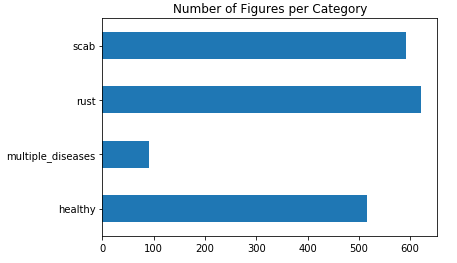

From the plot above we know that for scab, rust and healthy, the number of images for each class are more than 500, while for multiple diseases, the number of images is less than 100. So, it is an imbalanced dataset. In order to avoid bad prediction performance on minority class (multiple diseases in this case), we use Synthetic Minority Oversampling Technique (SMOTE) to oversample the minority class.

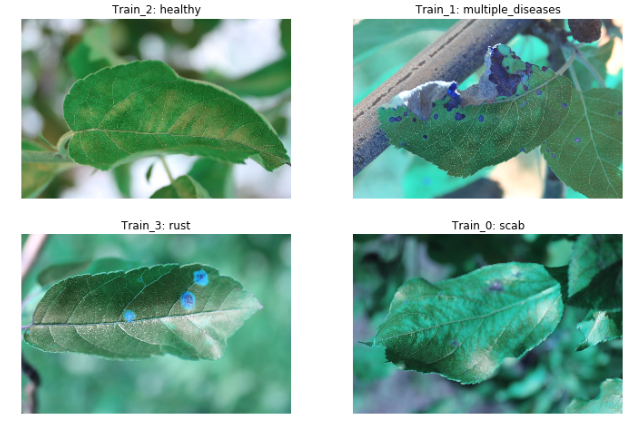

The four pictures above show the sample images for each class.

The original size of images are around 2000×1400, which is too large. Thus, we resize images to 100×100 with "INTER AREA" interpolation method in the OpenCV package, which is a preferred method for image decimation, since it gives moire-free result.

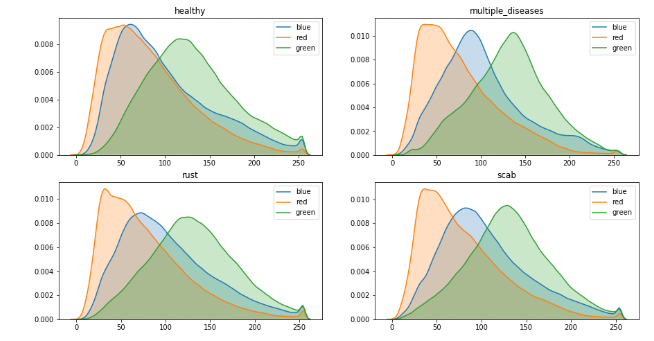

From the plots above we know the distribution of RGB channels for each class. Both red and green channels do not change a lot across different classes, while the distribution of the blue channel has much difference between classes. Thus we can deduce that the blue channel is crucial to detect diseases. Based on that, we try to only use the blue channel to train a KNN model and regard it as the base model.

#### Basic ML models 

We have implemented several classification models covered throughout the course, including **KNN, SVM, Random Forest, and XGBoost**. These methods are paired with some image preprocessing and feature extraction techniques, namely resizing, blue channel extraction, and the Histogram of Gradients (HOG) feature descriptor.

In particular, the Histogram of Oriented Gradients helps simplifies the image by extracting useful information and throwing away extraneous information. From a visual inspection of the gradient graph, we can tell that gradients are effective in identifying the edges of an apple leaf and spots of "rust" disease.

While with all other models, images are resized to 100x100. However, in models training with HOG feature vectors, images are resized to 136x136 to produce a feature vector length of 9216. This is chosen so that the feature vector length is comparable to that of the blue channel only input (vec size = 10,000). Additionally, for comparison, image size of 200x200 is also used to generate feature vectors of length 20,736. 

<img src="Images/grad3.png" width="1000" />

<img src="Images/grad1.png" width="1000" />

GridSearch was implemented for the training and tuning of all models in this section. Final prediction accuracy of the test set are summarized in the table below. We can observe the following: 

1) Using blue channel only is cable of producing similar classification results as using all three channels as inputs. 

2) Under the default attributes of HOG feature descriptor, 136x136 size image yields better results than 200x200 images across models. 

3) HOG is helpful in terms of reducing feature dimension and achieving better results.

4) All 4 models yields similar results in 0.5 to 0.6 range, the overall accuracy is not satisfactory.

5) Due to the limitation of time, we do not apply HOG to SVM and XGBoost, but we can deduce that the results will be rather similar with KNN and Random Forest.

| Model | Blue Channel Only | All Channels | HOG (vec=9216) | HOG (vec=20736) |
| --- | :---: | :---: | :---: | :---: | 
| KNN     |  0.50302  |  0.51046   |  **0.54315**   |  0.52084   |  
| RF      |  0.53429  |  0.54727   |  **0.55419**   |  0.54156   |
| SVM     |     0.51791      |     **0.54900**       |                |            |
| XGBoost |       0.53740    |      **0.55707**      |                |            |

Random Forest model is evaluated with ROC and PR curve. We can examine the one vs all classification result from these plots. The RF algorithm does an effective job classifying "multiple diseases". You can find the plots and associated coded in this section in "Random Forest.ipynb".

<img src="Images/eval.png" width="1000" />

#### CNN models

Apart from four basic models, we also try Convolutional Neural Network to solve the classification problem. In CNN, we use loss and accuracy curve to evaluate the methods. Also, several image augmentation methods are applied to different CNN models.

The simplest CNN model we use just has two convolutional layers and one maxpooling layer.
We use "Relu" as the activation function, the dropout rate is 0.5 in this case, and we use L2 regularizer in each layer. We also do batch normalization between layers. The batch size of this model is 32. The model detail is shown below:

1. Convolution layer: 32 filters, 5×5 kernel.
2. Convolution layer: 128 filters, 5×5 kernel.
3. Maxpooling layer: downsampling by 2×2 kernel.

In this model, we try several image augmentation methods including rotation, flipping, shifting, zooming and brightness adjustment. The parameter can be found in the "CNN-1.ipynb".

The plots below show the loss and accuracy of the first model. We run 200 epochs and can observe the convergence trend in both plots. We can see that the loss for the training set is around 0.6, and for the testing set is around 0.5. While for the accuracy, both sets converge to 0.8. With more epochs, there may be some improvement for both loss and accuracy. The final Kaggle score for this model is 0.87, which is much higher than the four models above. You can also find these two plots and associated codes in "CNN-1.ipynb".

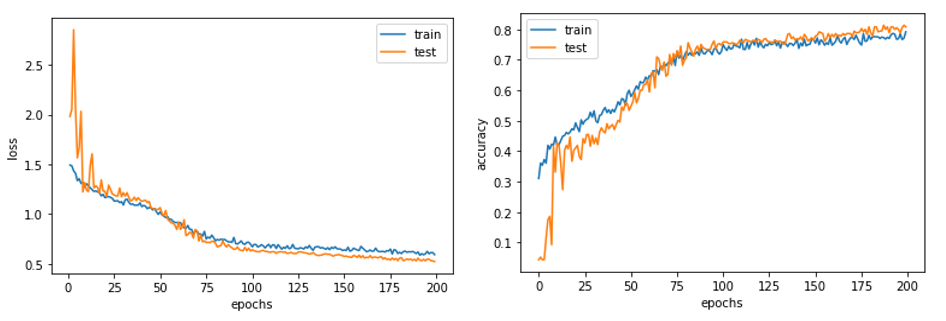

The second CNN model is much more complicated than the first one. We use six convolutional layers and three maxpooling layers. Compared with the first model, we still use "Relu" as the activation function, use L2 regularizer in each layer and also do batch normalization between layers. The difference is that the dropout rate is 0.25 in this case, and the batch size of this model is 24. The model detail is shown below:

1. Convolution layer: 32 filters, 5×5 kernel.
2. Convolution layer: 128 filters, 5×5 kernel.
3. Maxpooling layer: downsampling by 2×2 kernel.
4. Convolution layer: 128 filters, 3×3 kernel.
5. Convolution layer: 128 filters, 3×3 kernel.
6. Maxpooling layer: downsampling by 2×2 kernel.
7. Convolution layer: 128 filters, 5×5 kernel.
8. Convolution layer: 256 filters, 5×5 kernel.
9. Maxpooling layer: downsampling by 2×2 kernel.

In this model we only try two image augmentation methods which are horizontal flipping and vertical flipping. The parameter can be found in the "CNN-2.ipynb".

The plots below show the loss and accuracy of the first model. We run 300 epochs and can observe the convergence in both plots. We can see that the loss for the training set is almost 0, and for the testing set is around 0.5. While for the accuracy, we can observe that for the training set, the prediction accuracy is nearly 1, and for the testing set, the accuracy is around 0.91. With more epochs, there may be some improvement for both loss and accuracy. The final Kaggle score for this model is 0.919, which is higher than the first CNN model. It means that add more layers and epochs may have a positive effect on prediction accuracy. You can also find these two plots and associated codes in "CNN-2.ipynb".

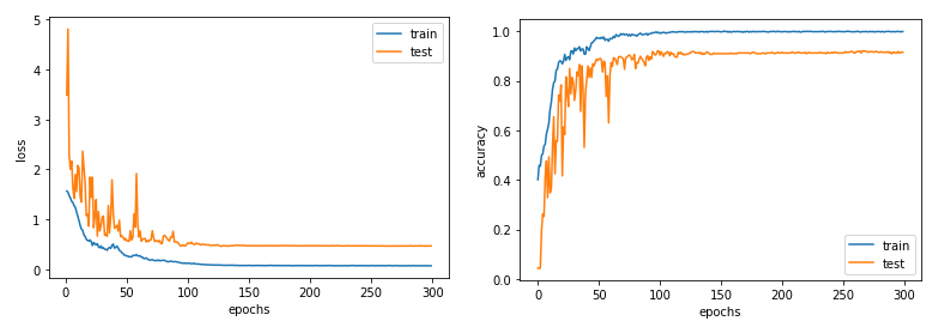

The third CNN model is the pretrained model by Google, which is the EfficientNet. This model has a great performance in the topic of image classification. We use the same batch size (32) and the same image augmentation methods with the first CNN model. The parameter can be found in the "EfficientNet.ipynb".

The plots below show the loss and accuracy of the EfficientNet model. Due to the speed issue, we just run 100 epochs for this model, and we can only observe the convergence trend in both plots. We may need more epochs to see the convergence. However, the performance of the model is good. For the training set, the loss is almost 0, and the accuracy is almost 1, while for the testing set, the loss is around 0.3, and the accuracy is between 0.9 and 0.95. The final Kaggle score for this model is 0.95, which is the highest among all models. It indicates that the EfficientNet model works well for detecting diseases in this case. You can also find these two plots and associated codes in "EfficientNet.ipynb".

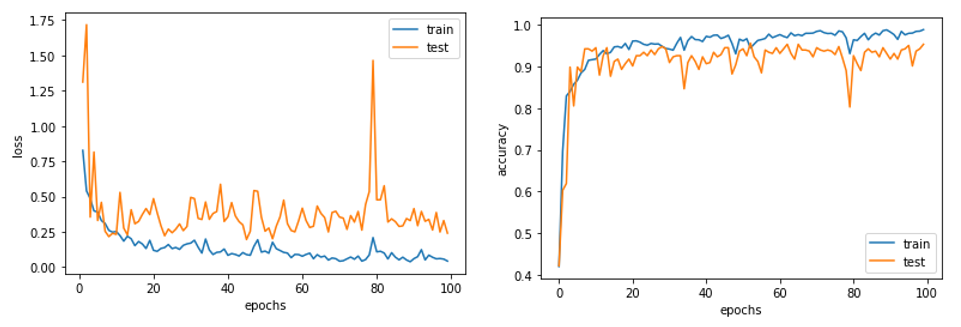

#### Exploration of the CNN model

As we are running the CNN models above, it has occurred to us that the number of convolutional layers as well as the parameters in each convolutional layer may play a vital role in influencing the accuracy of the model. And we are wondering who would have more determining effects on the model results.

To answer the question mentioned above, we have tried multiple combinations in the architecture of the model. We started with a simple model with just two convolutional layers, just like the first CNN model we displayed above. And its result is compared with two other models. One of them has the same number of convolutional layers with different parameters. And the other one has doubled the number of convolutional layers but the parameters are identical to the first one. And the result has been displayed in the following model.

| Model | Accuracy |
|------|------|
|   Original  | 0.8029|
|   Same Number of Layers With Different Parameters  | 0.8175|
|   Double Numbers of Layers With Identical Parameters to the Origianl Model  | 0.8504|

As the table above has shown, adding numbers of convolutional layers may have much stronger influences on the model accuracy than changing the parameters within the layer. Another information that can be extracted from this table is that adding the number of layers could highly improve the accuracy of the model. Based on this assumption, we have kept our experiment by adding more numbers of convolutional layers. We want to know if the greater number of layers means the higher accuracy for CNN models. And the following table has displayed what we have found.

| Model                                                                       | Accuracy |
|-----------------------------------------------------------------------------|----------|
|   Original (Two Convolutional Layers)                                       |  0.8029  |
|   Four Convolutional Layers                                                 |  0.8504  |
|   Six Convolutional Layers                                                  |  0.9103  |
|   Eight Convolutional Layers                                                |  0.9234  |

According to this table, the accuracy of the model is increasing with the number of convolutional layers. However, obviously, the relationship between the number of layers and the accuracy is not linear. Therefore, as we continue to increase the number of convolutional layers, we would reach a saturated situation where adding layers may not increase the accuracy but reduce it. That is what we called overfitting. That's why the second CNN model we displayed above has only six convolutional layers, which we believe is one of the best models we could reach at the moment.

#### Conclusion

Through this project, we have learned how to use different classificaition models to identify potential diseases on plants' leaves. We have identified that the distribution of blue channel in the image is a major identifier to the diseases on the leaves. Among all the different classification models being used in this project, the performance of CNN model has outplayed those of the other models. Over 0.9 of accuracy can be reached by using CNN while the other models could only give accuracy around 0.55. For CNN models, the accuracy increases with more convolutional layers being included within the model, while adding too many layers may cause an overfitting issue. And the highest accuracy (0.95) we have reached is using a pre-trained CNN model called EffecientNet. Hopefully, our results could help in reducing plant diseases in the real world.

---